<a href="https://colab.research.google.com/github/jlopez1288/-Python-projects-Data-201/blob/main/TweetSentimentAnalysis_By_JennLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction

**What is Sentimental Analysis?**
"*Sentiment Analysis is the most common text classification tool that analyses an incoming message and tells whether the underlying sentiment is positive, negative our neutral. "*

#Task 1: Define the Problem

To predict sentiment analysis using Natural Language Processing (NLP) in a Tweet Dataset where we coud implement models that can aim to surpass the challenges of identifying the sentiments  the tweets. 

#Task 2a: Install the Needed Libraries

In [ ]:
#Not Needed at this time

#Task 2b: Import the Needed Libraries

In [ ]:
#First up, I'll import every library that will be used in this project is imported at the start.

In [24]:
import re
import pickle
import numpy as np #data handling and processing
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob



# Statistics
from scipy import stats
import statsmodels.api as sm
from scipy.stats import randint as sp_randint
from time import time

# nltk
import nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [17]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Task 3: Load the Data

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
columns=["sentiment", "ids", "date", "flag", "user", "text"]
encoding= "ISO-8859-1"
tweet = pd.read_csv('/content/drive/MyDrive/Tweets.csv',encoding = encoding, names = columns)

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [39]:
tweet.head()

,sentiment,ids,date,flag,user,text


##Get Data Info

In [8]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  0 non-null      object
 1   ids        0 non-null      object
 2   date       0 non-null      object
 3   flag       0 non-null      object
 4   user       0 non-null      object
 5   text       0 non-null      object
dtypes: object(6)
memory usage: 0.0+ bytes


In [9]:
tweet.columns

Index(['sentiment', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [10]:
tweet.dtypes

sentiment    object
ids          object
date         object
flag         object
user         object
text         object
dtype: object

In [11]:
tweet.describe()

,sentiment,ids,date,flag,user,text
count,0,0,0,0,0,0
unique,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN


##Find Missing Values

In [12]:
tweet.isnull()

,sentiment,ids,date,flag,user,text


In [13]:
tweet.isnull().sum().sort_values(ascending=False)

sentiment    0.0
ids          0.0
date         0.0
flag         0.0
user         0.0
text         0.0
dtype: float64

In [ ]:

#Sorting values from the highest to the lowest

In [14]:
len(tweet)

0

In [15]:
#Visualize missing values
sns.heatmap(tweet.isnull(), yticklabels=False,cbar=False,cmap='viridis')

ValueError: ignored

In [ ]:
#columns show white line, maybe they are presorted or organized?

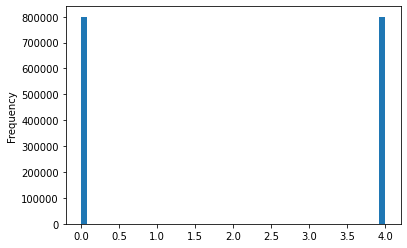

In [30]:
tweet['sentiment'].plot(bins=50, kind='hist')

In [ ]:
#Distribution plot for sentiment column

#Task 5: Perform Data Cleaning

In [33]:
tweet.drop_duplicates()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [34]:
# Removing the unnecessary columns.
tweet = tweet[['sentiment','text']]

#Task 6: Visualize Cleaned up Dataset

In [35]:
tweet.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [38]:
tweet['sentiment'].unique()

array([0, 4])

In [ ]:
#array should be binary when training and testing the models. Otherwise it would be a problem

In [ ]:
#To ease the understanding values have to be 0,1 or 1,0, etc... In this case 4 has to be replaced

In [39]:
tweet['sentiment'] = tweet['sentiment'].replace(4, 1)

<ipython-input-39-1bbb48d8dafa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['sentiment'] = tweet['sentiment'].replace(4, 1)


In [40]:
tweet['sentiment'].unique()

array([0, 1])

In [ ]:
#now data is in binary form

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


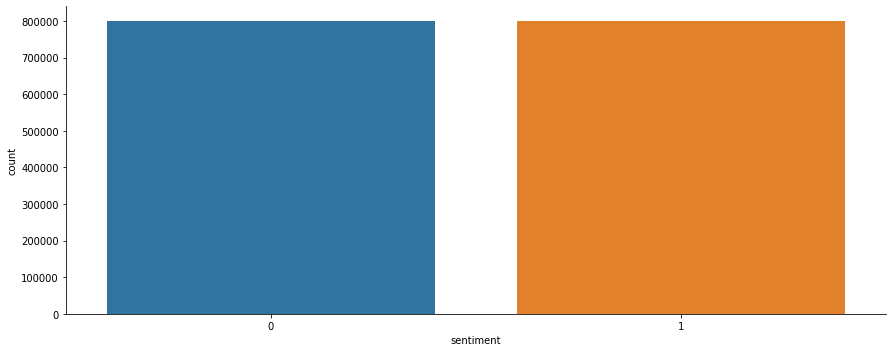

In [44]:
#Visualize array
sns.catplot('sentiment', data=tweet, kind='count',aspect=2.5)

In [ ]:
#We could use 0=negative and 1= positive to visualize the problem

#Task 7: Conceptualize the problem

In [41]:
tweet.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


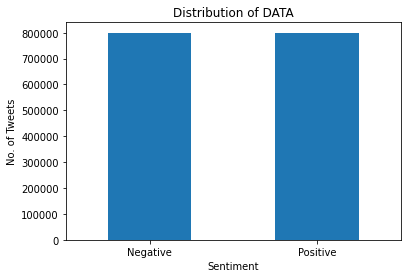

In [42]:
# Data Distribution Plot
graph = tweet.groupby('sentiment').count().plot(kind='bar', title='Distribution of DATA',
                                               legend=False)
graph.set_xticklabels(['Negative','Positive'], rotation=0)

graph.set_xlabel('Sentiment')
graph.set_ylabel('No. of Tweets')
# Storing data in lists.
text, sentiment = list(tweet['text']), list(tweet['sentiment'])

In [ ]:
#data is equally distributed

In [2]:
# Generate a word cloud image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: ignored

In [45]:
#Create a dictionary to understand meanings or concepts
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [46]:
#Use of stop words
## Defining set containing all stopwords in english.
stopwords = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [48]:
tweet.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
#Data needs to be preproccessed since it has too many character and other patters that can affect the model

In [51]:
text2=list(tweet['text'])

In [52]:
text2

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ',
 "spring break in plain city... it's snowing ",
 'I just re-pierced my ears ',
 "@caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .",
 '@octolinz16 It it counts, idk why I did either. you never talk to me anymore ',
 "@smarrison i wo

In [56]:
lemmatizer = WordNetLemmatizer()
# grouping together the inflected forms ("better" -> "good")

def preprocess(textdata):
    processed_texts = []

    # Defining regex patterns.
    url_pattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    user_pattern = '@[^\s]+'
    alpha_pattern = "[^a-zA-Z0-9]"
    sequence_pattern = r"(.)\1\1+"
    seq_replace_pattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(url_pattern, ' URL', tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
            # Replace @USERNAME to 'USER'.
        tweet = re.sub(user_pattern, ' USER', tweet)
        # Replace all non alphabets.
        tweet = re.sub(alpha_pattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequence_pattern, seq_replace_pattern, tweet)

        preprocessed_words = []
        for word in tweet.split():
            # Check if the word is a stopword.
            if len(word) > 1 and word not in stopwords:
                # Lemmatizing the word.
                word = lemmatizer.lemmatize(word)
                preprocessed_words.append(word)

        processed_texts.append(' '.join(preprocessed_words))

    return processed_texts

In [57]:
processedtext= preprocess (text2)

In [58]:
print (tweet)

         sentiment                                               text
0                0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1                0  is upset that he can't update his Facebook by ...
2                0  @Kenichan I dived many times for the ball. Man...
3                0    my whole body feels itchy and like its on fire 
4                0  @nationwideclass no, it's not behaving at all....
...            ...                                                ...
1599995          1  Just woke up. Having no school is the best fee...
1599996          1  TheWDB.com - Very cool to hear old Walt interv...
1599997          1  Are you ready for your MoJo Makeover? Ask me f...
1599998          1  Happy 38th Birthday to my boo of alll time!!! ...
1599999          1  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 2 columns]


#Task 8: Perform Data-Split

In [ ]:
#Data is splitted in 80% for training method and 20% for testing

In [61]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.05, random_state = 0)

#Task 9: Choose the ML Method to follow

In [63]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features = 500000)
vectorizer.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 3))

#Task 10: Train the ML Model

In [ ]:
#train a model = create the model 

In [64]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

#Task 11: Test the Model

In [65]:
#Set up some parameters to evaluate and test the model
def model_evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

In [66]:
#Let's test with a Logistic Regression Model
LRmodel = LogisticRegression(C = 1, max_iter = 100, n_jobs=1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.82      0.80      0.81     39989
           1       0.81      0.82      0.82     40011

    accuracy                           0.81     80000
   macro avg       0.81      0.81      0.81     80000
weighted avg       0.81      0.81      0.81     80000



In [ ]:
#Accurary level 81%

In [67]:
#Testing LRM again by increasing the amount of iterations from the module
LRmodel = LogisticRegression(C = 1, max_iter = 500, n_jobs=1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.82      0.80      0.81     39989
           1       0.81      0.83      0.82     40011

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



In [ ]:
#Accuracy level s 82% a little higher than the first run

In [ ]:
#SVC MODEL

In [68]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     39989
           1       0.80      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



In [ ]:
#Accuracy level is 80%

In [69]:
BNBmodel = BernoulliNB(alpha = 3)
BNBmodel.fit(X_train, y_train)
model_evaluate(BNBmodel)

              precision    recall  f1-score   support

           0       0.81      0.78      0.79     39989
           1       0.79      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



In [ ]:
#Accuracy level 80%

In [70]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.05, random_state = 0)

pipe = Pipeline([('vectorizer', vectorizer), ('bnb', BNBmodel)])
pipe.fit(X_train, y_train)

model_evaluate(pipe)

              precision    recall  f1-score   support

           0       0.81      0.78      0.79     39989
           1       0.79      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



In [81]:
with open('/content/drive/MyDrive/Tweets.csv','wb') as file:
    pickle.dump(pipe,file)

In [82]:
with open('/content/drive/MyDrive/Tweets.csv','wb') as file:
    loaded_pipe= pickle.load

In [83]:
model_evaluate(loaded_pipe)

AttributeError: ignored

##Challenges


*   My challenges have been several including: trying to keep the dataset in place. My data loading and crashing was the most challenging. Also reading through the errors and trying to identify and implement the codes and parameter for the word cloud, lemmatizer, data dumping and uploading with pickle



##Conclusion:
My conclusion or findings were not completed since I could not go through the last steps in the sentiment analysis.  If I had ran the models after using pickle data dump and load.
 I would've used SVC Model as my main model to predict the tweets within my dataset since SVC model is more trainable than linear regression from the research that I did. I could have used a tokenizer and better optimization tools. My data was not fully loaded and could not run all the steps.

##References
https://www.nltk.org/howto/sentiment.html

https://www.kaggle.com/code/kritanjalijain/twitter-sentiment-analysis-lstm/notebook

https://monkeylearn.com/blog/data-cleaning-python/#:~:text=Data%20Cleaning%20With%20Python%201%201.%20Importing%20Libraries,Detect%20Outliers%20...%206%206.%20Normalize%20Casing%20

https://stackoverflow.com/questions/20626028/sklearn-import-error-cannot-import-name-tfidfvectorizer

https://www.w3schools.com/python/python_ml_train_test.asp

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

https://scikit-learn.org/stable/modules/preprocessing_targets.html#:~:text=The%20MultiLabelBinarizer%20transformer%20can%20be%20used%20to%20convert,of%20collections%20of%20labels%20and%20the%20indicator%20format%3A

https://scikit-learn.org/stable/modules/preprocessing.html

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

https://towardsdatascience.com/sentiment-analysis-concept-analysis-and-applications-6c94d6f58c17


